# Imports

In [6]:
# Work with data
import pandas as pd
import numpy as np

# Fin data sources
import yfinance as yf
import pandas_datareader as pdr

# Data viz
import plotly.graph_objs as go
from datetime import date

# Question 1: [Macro] Average growth of GDP in 2023
What is the average growth (in %) of GDP in 2023?

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [7]:
end = date.today()
start = date(year=end.year - 100, month=end.month, day=end.day)
print(f"Period of indexes: {start} - {end}")

Period of indexes: 1924-05-16 - 2024-05-16


In [8]:
gdpc = pdr.DataReader("GDPC1", "fred", start=start)

In [9]:
#Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago)
gdpc['gdbc_us_yoy'] = (gdpc.GDPC1 / gdpc.GDPC1.shift(4) - 1) * 100
gdpc['gdbc_us_yoy'] = gdpc['gdbc_us_yoy']
gdpc.tail()

,GDPC1,gdbc_us_yoy
DATE,,
2023-01-01,22112.329,1.717927
2023-04-01,22225.350,2.382468
2023-07-01,22490.692,2.926887
2023-10-01,22679.255,3.134491
2024-01-01,22768.866,2.969099


Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='DATE'>

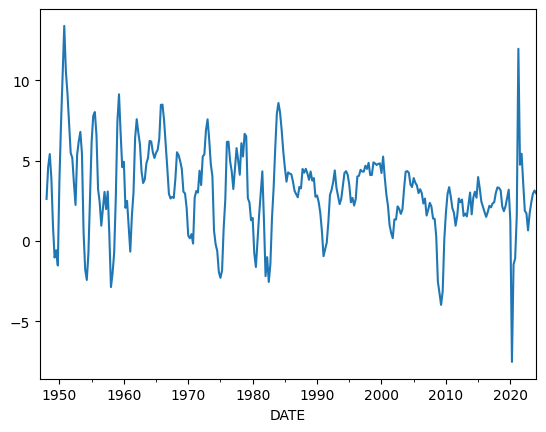

In [10]:
gdpc.gdbc_us_yoy.plot.line()

In [11]:
gdpc[gdpc.index < '2024-01-01'].tail(4)

,GDPC1,gdbc_us_yoy
DATE,,
2023-01-01,22112.329,1.717927
2023-04-01,22225.350,2.382468
2023-07-01,22490.692,2.926887
2023-10-01,22679.255,3.134491


In [12]:
# Find the average YoY growth in 2023 (average from 4 YoY numbers).
# Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7
gdpc[gdpc.index < '2024-01-01'].tail(4).mean().round(1)

GDPC1          22376.9
gdbc_us_yoy        2.5
dtype: float64

# Question 2. [Macro] Inverse "Treasury Yield"
Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [13]:
# Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10).
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs10 = pdr.DataReader("DGS10", "fred", start=start)

In [14]:
# Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.
joined_df = dgs2.join(dgs10, how='inner', lsuffix='_2yr', rsuffix='_10yr')
joined_df['diff'] = joined_df.DGS10 - joined_df.DGS2
joined_df

,DGS2,DGS10,diff
DATE,,,
1976-06-01,7.26,7.94,0.68
1976-06-02,7.23,7.94,0.71
1976-06-03,7.22,7.92,0.70
1976-06-04,7.12,7.89,0.77
1976-06-07,7.09,7.88,0.79
...,...,...,...
2024-05-09,4.80,4.45,-0.35
2024-05-10,4.87,4.50,-0.37
2024-05-13,4.85,4.48,-0.37


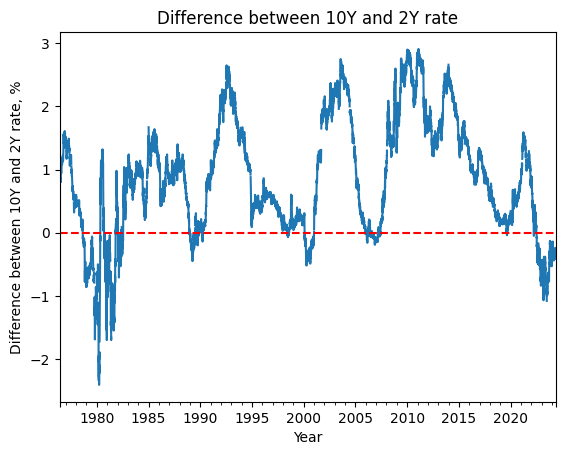

In [15]:
import matplotlib.pyplot as plt

# Plot line chart
joined_df['diff'].plot.line()

# Add horisontal line
plt.axhline(y=0, color='r', linestyle='--')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Difference between 10Y and 2Y rate, %')
plt.title('Difference between 10Y and 2Y rate')

# Show the plot
plt.show()

In [16]:
# Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.
joined_df_after_2000 = joined_df[joined_df.index >= '2000-01-01']
joined_df_after_2000['diff'].min().round(1)

-1.1

In [17]:
argmin = joined_df_after_2000['diff'].argmin()
joined_df_after_2000.iloc[argmin]

DGS2     4.94
DGS10    3.86
diff    -1.08
Name: 2023-07-03 00:00:00, dtype: float64

# Question 3. [Index] Which Index is better recently?
Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [18]:
# Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/)
snp500_gspc = yf.download('^GSPC', period='max', interval='1d')
snp500_mmx = yf.download('^MXX', period='max', interval='1d')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [19]:
gspc_growth = snp500_gspc.loc['2024-04-09', 'Adj Close'] / snp500_gspc.loc['2019-04-09', 'Adj Close']
mmx_growth = snp500_mmx.loc['2024-04-09', 'Adj Close'] / snp500_mmx.loc['2019-04-09', 'Adj Close']
gspc_growth, mmx_growth

(1.8101279426847174, 1.2750624912566744)

In [20]:
# Compare 5Y growth for both (between 2019-04-09 and 2024-04-09).
# Select the higher growing index and write down the growth in % (closest integer %).
# E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.
round((max(gspc_growth, mmx_growth) - 1) * 100)

81

In [21]:
# Average growth (CAGR) in the last 5 years
((gspc_growth ** (1 / 5)) - 1) * 100

12.600898118256554

# Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks
Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [22]:
# Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.
# Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value.
tickerslist = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']
res = {}

for ticker in tickerslist:
    data = yf.download(
        tickers=ticker,
        start='2023-01-01',
        end='2023-12-31',
        interval='1d')
    min_price = data['Adj Close'].min()
    max_price = data['Adj Close'].max()
    range_ratio = (max_price - min_price) / max_price
    res[ticker] = range_ratio
    print('')
    print(f'Ticker: {ticker}, min_price: {min_price}, max_price: {max_price}, range_ratio: {range_ratio}')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Ticker: 2222.SR, min_price: 27.09267807006836, max_price: 34.46601486206055, range_ratio: 0.21393064505721546

Ticker: BRK-B, min_price: 293.510009765625, max_price: 370.4800109863281, range_ratio: 0.20775750091289963


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Ticker: AAPL, min_price: 123.99845886230469, max_price: 197.5895233154297, range_ratio: 0.37244416211098935

Ticker: MSFT, min_price: 219.55335998535156, max_price: 381.30584716796875, range_ratio: 0.42420667918937977


[*********************100%%**********************]  1 of 1 completed



Ticker: GOOG, min_price: 86.7699966430664, max_price: 142.82000732421875, range_ratio: 0.3924520921912013


[*********************100%%**********************]  1 of 1 completed


Ticker: JPM, min_price: 120.73723602294922, max_price: 168.2747344970703, range_ratio: 0.28249932240985787


In [23]:
res

{'2222.SR': 0.21393064505721546,
 'BRK-B': 0.20775750091289963,
 'AAPL': 0.37244416211098935,
 'MSFT': 0.42420667918937977,
 'GOOG': 0.3924520921912013,
 'JPM': 0.28249932240985787}

In [24]:
# Round the result to two decimal places (e.g. 0.1575 will be 0.16)
sorted_res = sorted(res.items(), key=lambda x: x[1], reverse=True)
round(sorted_res[0][1], 2)

0.42

# Question 5. [Stocks] Dividend Yield
Find the largest dividend yield for the same set of stocks

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023. You can use get_actions() method or .dividends field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximum value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [25]:
# Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023.
# Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.
tickerslist = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']
div_res = {}

for ticker in tickerslist:
    actions = yf.Ticker(ticker).get_actions()
    div_2023 = actions[(actions.index >= '2023-01-01') & (actions.index <= '2023-12-31')]
    data = yf.download(
        tickers=ticker,
        start='2023-01-01',
        end='2023-12-31',
        interval='1d')
    last_value = data.tail(1)
    dividends_total = div_2023.Dividends.sum()
    div_ratio = dividends_total / last_value['Adj Close'].values[0]
    div_yield_percent = div_ratio * 100
    div_res[ticker] = div_yield_percent
    print('')
    print(
        f'Ticker: {ticker}, dividends_total: {dividends_total}, last_value: {last_value}, div_ratio: {div_ratio}, div_yield_percent: {div_yield_percent}')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Ticker: 2222.SR, dividends_total: 0.9107640000000001, last_value:                  Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2023-12-28  33.150002  33.25  32.950001  33.049999  32.693539  12720450, div_ratio: 0.027857614598126232, div_yield_percent: 2.785761459812623

Ticker: BRK-B, dividends_total: 0.0, last_value:                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-29  357.559998  357.859985  355.309998  356.660004  356.660004   

             Volume  
Date                 
2023-12-29  3269400  , div_ratio: 0.0, div_yield_percent: 0.0


[*********************100%%**********************]  1 of 1 completed



Ticker: AAPL, dividends_total: 0.95, last_value:                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.024185   

              Volume  
Date                  
2023-12-29  42628800  , div_ratio: 0.004947293483402634, div_yield_percent: 0.4947293483402634


[*********************100%%**********************]  1 of 1 completed



Ticker: MSFT, dividends_total: 2.79, last_value:              Open        High         Low       Close   Adj Close    Volume
Date                                                                       
2023-12-29  376.0  377.160004  373.480011  376.040009  374.670074  18723000, div_ratio: 0.0074465514866636, div_yield_percent: 0.74465514866636


[*********************100%%**********************]  1 of 1 completed



Ticker: GOOG, dividends_total: 0.0, last_value:                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-29  140.679993  141.434998  139.899994  140.929993  140.929993   

              Volume  
Date                  
2023-12-29  14872700  , div_ratio: 0.0, div_yield_percent: 0.0


[*********************100%%**********************]  1 of 1 completed


Ticker: JPM, dividends_total: 4.05, last_value:              Open        High         Low       Close   Adj Close   Volume
Date                                                                      
2023-12-29  170.0  170.690002  169.630005  170.100006  168.077118  6431800, div_ratio: 0.02409608190645897, div_yield_percent: 2.409608190645897


In [26]:
# Find the maximum value in % and round to 1 digit after the decimal point.
sorted_div_res = sorted(div_res.items(), key=lambda x: x[1], reverse=True)
round(sorted_div_res[0][1], 2)

2.79